In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [147]:
dframe=pd.read_csv("D:/winequality-red.csv")
dframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [148]:
dframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [149]:
dframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Q1 

In [150]:
dframe['Good_Quality'] = dframe['quality'].apply(lambda x: 1 if x >= 7 else 0)

dframe.drop('quality', axis=1, inplace=True)

dframe
# dframe['Good_Quality'].sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Good_Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [151]:
# dframe["Good_Quality"].value_counts()

## Q2

## Handling if any null or missing value

In [152]:
dframe.replace(dframe.mean(), np.nan, inplace=True)
dframe = dframe.fillna(dframe.mean())

# dframe.isna().sum()

## Handling outliers

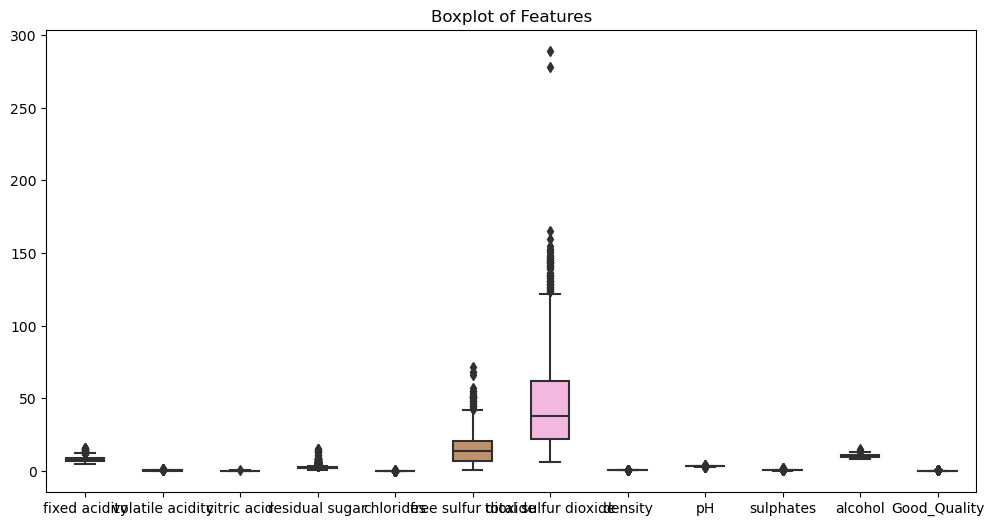

In [153]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dframe, orient='v', width=0.5, palette='colorblind')
plt.title('Boxplot of Features')
plt.show()

In [154]:
from scipy.stats import zscore
z_scores = np.abs(zscore(dframe))
outliers = (z_scores > 3).all(axis=1)
df_no_outliers = dframe[~outliers]

# def remove_outliers_zscore(df,feature,z_score_threshold=3):
#     mean_value = df[feature].mean()
#     std_dev = df[feature].std()

#     df['z_score'] = (df[feature] - mean_value) / std_dev

#     outliers = df[abs(df['z_score']) > z_score_threshold]
#     df = df[abs(df['z_score']) <= z_score_threshold]

#     return df.drop(columns=['z_score'])

# for i in df.columns:
#     remove_outliers_zscore(dframe,i,z_score_threshold=3)

## Correlation Matrix

In [155]:
corr_df=df_no_outliers.corr()
corr_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Good_Quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


<Axes: >

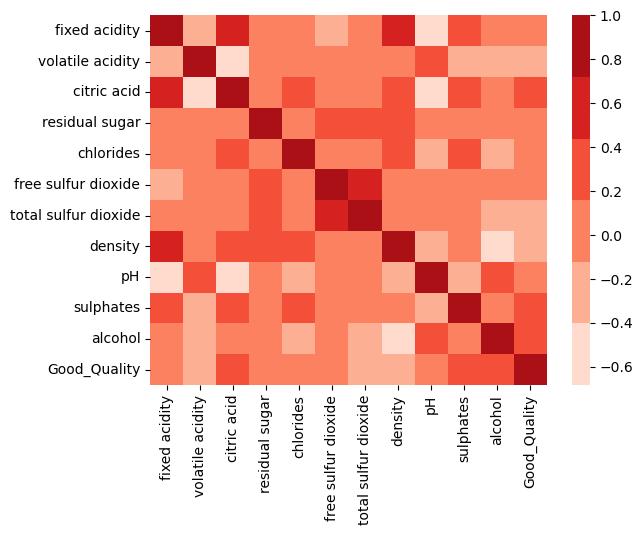

In [156]:
import seaborn as sns
sns.heatmap(data=corr_df,cmap=sns.color_palette("Reds"))


## Q3

(a) Logistic Regression

In [157]:
df=pd.read_csv("D:/winequality-red.csv")
df["Good_Quality"]=dtdf['quality'].apply(lambda x: 1 if x >= 7 else 0)
df

dfnew = dtdf.iloc[:,-2:]
dfnew

,quality,Good_Quality
0,5,0
1,5,0
2,5,0
3,6,0
4,5,0
...,...,...
1594,5,0
1595,6,0
1596,6,0
1597,5,0


In [158]:
dfnew_input = dfnew['quality'].values.reshape(-1, 1)
dfnew_target = dfnew['Good_Quality'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test=train_test_split(dfnew_input,dfnew_target,test_size=0.4)

In [159]:
lgr=LogisticRegression()
X_test

array([[7],
       [5],
       [6],
       [6],
       [5],
       [6],
       [5],
       [7],
       [5],
       [6],
       [5],
       [6],
       [6],
       [7],
       [7],
       [3],
       [7],
       [6],
       [7],
       [4],
       [3],
       [5],
       [5],
       [5],
       [7],
       [5],
       [5],
       [6],
       [6],
       [7],
       [5],
       [6],
       [5],
       [6],
       [6],
       [5],
       [6],
       [7],
       [6],
       [7],
       [4],
       [5],
       [6],
       [5],
       [7],
       [6],
       [6],
       [6],
       [6],
       [5],
       [5],
       [8],
       [6],
       [7],
       [6],
       [6],
       [5],
       [4],
       [6],
       [6],
       [7],
       [6],
       [5],
       [5],
       [5],
       [7],
       [6],
       [6],
       [6],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [7],
       [6],
       [5],
       [5],
       [6],
       [6],
       [7],
       [6],
    

In [160]:
import warnings
warnings.filterwarnings("ignore")
lgr.fit(X_train,y_train)

lgr_pred=lgr.predict(X_test)

In [161]:
lgr.score(X_test,y_test)

1.0

In [162]:
lgr.predict_proba(X_test)

array([[6.07378904e-02, 9.39262110e-01],
       [9.99981260e-01, 1.87403427e-05],
       [9.83261163e-01, 1.67388366e-02],
       ...,
       [9.83261163e-01, 1.67388366e-02],
       [9.83261163e-01, 1.67388366e-02],
       [6.07378904e-02, 9.39262110e-01]])

## Q3
(b) K Nearest Neighbour

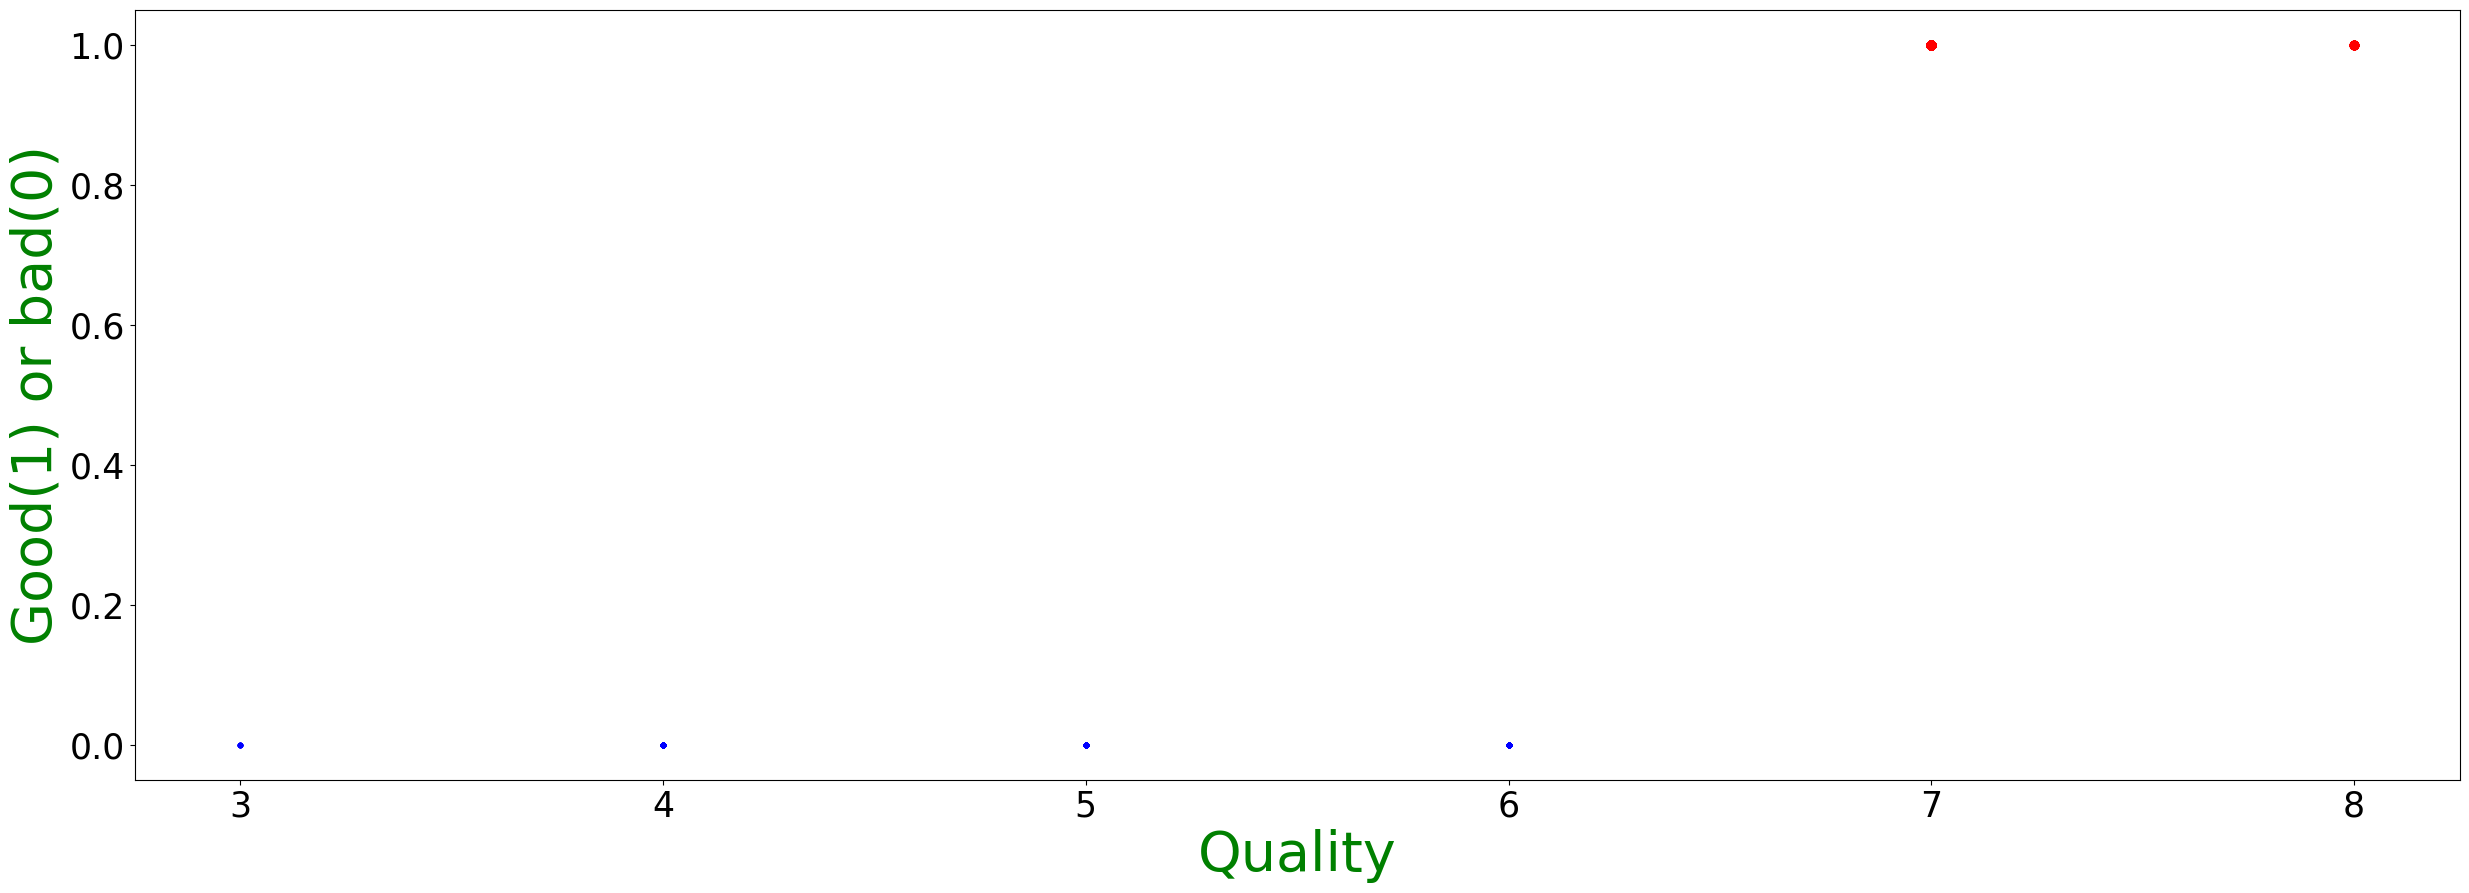

In [163]:
# df0=df_no_outliers[df_no_outliers["Good_Quality"]==0]
# df1=df_no_outliers[df_no_outliers["Good_Quality"]==1]

# df_org=pd.read_csv("D:/winequality-red.csv")
# z_scores = np.abs(zscore(df_org))
# outliers = (z_scores > 3).all(axis=1)
# df_original = df_org[~outliers]

# df0_original=df_original[df_original["quality"]<7]
# df1_original=df_original[df_original["quality"]>=7]

dfnew0=dfnew[dfnew["quality"]<7]
dfnew1=dfnew[dfnew["quality"]>=7]
plt.figure(figsize=(30,10))
plt.ylabel("Good(1) or bad(0)",size=40,color="green")
plt.xlabel("Quality",size=40,color="green")
plt.xticks(size=25)
plt.yticks(size=25)
plt.scatter(dfnew0["quality"],dfnew0["Good_Quality"],color="blue",marker=".")
plt.scatter(dfnew1["quality"],dfnew1["Good_Quality"],color="red",marker="o")


#plt.scatter(df0_original["quality"],df0["Good_Quality"],color="blue",marker=".")
#plt.scatter(df1_original["quality"],df1["Good_Quality"],color="red",marker="o")


# plt.plot(df0_original["quality"],"bo")
# plt.plot(df0_original["quality"], "ro")

In [164]:
# df_X=df0_original
# df_Y=df0["Good_Quality"]
X_train,X_test,y_train,y_test=train_test_split(dfnew['quality'].values.reshape(-1,1),dfnew['Good_Quality'].values.reshape(-1,1),test_size=0.4)

In [165]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

In [166]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

## Q3
(c)

In [167]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier()

In [168]:
dtdfnew_input = dtdfnew['quality'].values.reshape(-1, 1)
dtdfnew_target = dtdfnew['Good_Quality'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test=train_test_split(dtdfnew_input,dtdfnew_target,test_size=0.4)

In [169]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [170]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [171]:
dtc.score(X_test,dtc_pred)

1.0

In [172]:
#Predicting where Quality is good or bad for Quality 6
print(dtc.predict([[6]]))
#Predicting where Quality is good or bad for Quality 8
print(dtc.predict([[8]]))
#Predicting where Quality is good or bad for Quality 7
print(dtc.predict([[7]]))

[0]
[1]
[1]


In [184]:
a=input("quality score: ")
print("0 = bad, 1 = good\nThe quality of wine is: ",dtc.predict([[a]]) )

quality score: 8
0 = bad, 1 = good
The quality of wine is:  [1]


## Q3
(d)

In [174]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [175]:
rfc.score(X_test,y_test)
#score is 1 in most cases since the data is precisely separated about 7 score as threshold score

1.0

In [176]:
rfc_pred=rfc.predict(X_test)

In [183]:
a=input("quality score: ")
print("0 = bad, 1 = good\nThe quality of wine is: ",rfc.predict([[a]]) )

quality score: 8
0 = bad, 1 = good
The quality of wine is:  [1]


## Q3
(e)

##### Defining Sigmoid Function

In [178]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

##### Defining Logistic Regression functions

In [191]:

def lgr_fit(X, y, lrate=0.0001, iterations=1000):
    m,n = X.shape
    #intializing
    weights = np.zeros((n, 1))
    bias = 0

    for i in range(iterations):
        pred = sigmoid(np.dot(X, weights) + bias) #z=weight.X + bias (mx+b)
        #Gradients
        dw = (1 / m) * np.dot(X.T, (pred - y))
        db = (1 / m) * np.sum(pred - y)

        # Update weights and bias
        weights =weights - (lrate * dw)
        bias = bias - (lrate * db)

    return weights,bias

In [192]:
weights, bias = lgr_fit(X_train, y_train)

In [193]:
predi = sigmoid(np.dot(X_test, weights) + bias)
predi

array([[0.3429177 ],
       [0.28903787],
       [0.3429177 ],
       [0.31535745],
       [0.31535745],
       [0.31535745],
       [0.37157931],
       [0.31535745],
       [0.31535745],
       [0.3429177 ],
       [0.31535745],
       [0.3429177 ],
       [0.3429177 ],
       [0.37157931],
       [0.31535745],
       [0.3429177 ],
       [0.37157931],
       [0.31535745],
       [0.3429177 ],
       [0.3429177 ],
       [0.3429177 ],
       [0.3429177 ],
       [0.31535745],
       [0.31535745],
       [0.3429177 ],
       [0.31535745],
       [0.31535745],
       [0.3429177 ],
       [0.31535745],
       [0.3429177 ],
       [0.31535745],
       [0.3429177 ],
       [0.3429177 ],
       [0.3429177 ],
       [0.28903787],
       [0.28903787],
       [0.3429177 ],
       [0.37157931],
       [0.3429177 ],
       [0.31535745],
       [0.3429177 ],
       [0.3429177 ],
       [0.3429177 ],
       [0.3429177 ],
       [0.3429177 ],
       [0.3429177 ],
       [0.31535745],
       [0.289

## Q4

In [194]:
from sklearn.metrics import accuracy_score, f1_score
model = ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree Classifier', 'Random Forest Classifier']
for i, y_pred in enumerate([lgr_pred, knn_pred, dtc_pred, rfc_pred]):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"For {model[i]}, Accuracy score is {acc} and F1 score is {f1}")

For Logistic Regression, Accuracy score is 0.7515625 and F1 score is 0.1016949152542373
For K-Nearest Neighbor, Accuracy score is 0.75 and F1 score is 0.08045977011494253
For Decision Tree Classifier, Accuracy score is 1.0 and F1 score is 1.0
For Random Forest Classifier, Accuracy score is 1.0 and F1 score is 1.0
